# 3. Digital Signal Processing (DSP) - LTI
_author: Maurice Snoeren_ <br>
_date: 10-04-2021_

This Jupyter notebook is used to practice with the DSP theory in software .Within this course we take time serie signals and perform linear time invariant filtering.

## What about frequencies?!

We talk about frequencies and the analog signal only contains one frequency? What is this?! As you may know that true colors of light can be described by three main colors, namely red, green and blue (RGB). Your television has pixels that have these three colors.

For continous time signals, we are able to describe these signals by frequency components of sines and cosines. Fourier was busy with solving problems of thermal dynamics using mathematical series. He showed that periodical signals can be described by a sum of weigthed harmonics of sine functions. Furtermore, he showed that also for non periodic signals it is possible to describe with non harmonic sine functions. This is the basis of the Fouries series and Fourier transform. Transforming time serie to the frequency domain.

## Periodical signals

When a signal is strict periodical, then there exist a harmonic correlation between the freqeuncy components. This is the fourier series:

$ x(t) = a_0 + a_1 Cos(t) + b_1 Sin(t) + a_2 Cos(2t) + b_2 Sin(2t) + a_3 Cos(3t) + b_3 Sin(3t) + ... $

$ x(t) = \frac{1}{2} a_0 + \sum\limits_{k=0}^{\infty}{a_k Cos(kw_0t) + b_k Sin(kw_0t)} $

The coefficient $a_k$ and $b_k$ can be calculated as follows

$ a_k = \frac{2}{T}\int_{\frac{-T}{2}}^{\frac{T}{2}}{x(t) Cos(kw_0t)dt} $

$ b_k = \frac{2}{T}\int_{\frac{-T}{2}}^{\frac{T}{2}}{x(t) Sin(kw_0t)dt} $

This look very complex, but if you look closer it is not that difficult to understand. Put your math's hat on! The fourier serie $x(t)$ shows how much sines and cosines are in the signal. How much is represented by $a_k$ and $b_k$. So, if we have to sines within our signal, than the $a_k$ will be all zero and only two $b_k$'s are non zero. That is the easy part!

If we look closer to the $a_k$ equation, then we integrate the continuous time serie multiplied by a sine on a specific frequency, namely $kw_0$. If the $x(t)$ correlates a lot with $Sin(kw_0t)$, than the result will be big. Otherwise the value of $a_k$ will be small. So, using the integral function, we are able to get a value that represent how much the sine (or cosine) is represented in the continous periodical signal $x(t)$.

Example of a signal that we all are very familiar with; a clock signal! See how we can describe it by its frequencies.

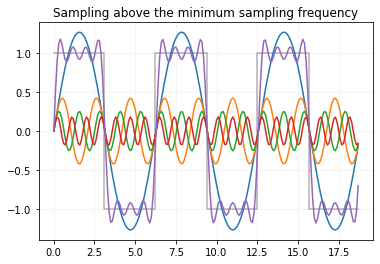

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def clock_signal(t, A, T):
    if (t % (2*np.pi) < np.pi):
        return A
    else:
        return -A
    
def fourier_serie(k, t):
    return (2/(k*np.pi))*(1-(-1)**k)*np.sin(k*t)

T = 2*np.pi
A = 1
dt = 0.1
t = []
x = []
fs1 = []
fs2 = []
fs3 = []
fs4 = []
fs  = []
for x1 in range(int(3*T/dt)):
    t.append(x1*dt)
    x.append(clock_signal(t[x1], A, T))
    fs1.append(fourier_serie(1, t[x1]))
    fs2.append(fourier_serie(3, t[x1]))
    fs3.append(fourier_serie(5, t[x1]))
    fs4.append(fourier_serie(7, t[x1]))
    fs.append(fs1[x1] + fs2[x1] + fs3[x1] + fs4[x1])
    
plt.step(t, x, color='black', alpha=0.3)
plt.plot(t,  fs1)
plt.plot(t,  fs2)
plt.plot(t,  fs3)
plt.plot(t,  fs4)
plt.plot(t,  fs)

plt.grid(color='0.95')
plt.title('Sampling above the minimum sampling frequency')
plt.show()

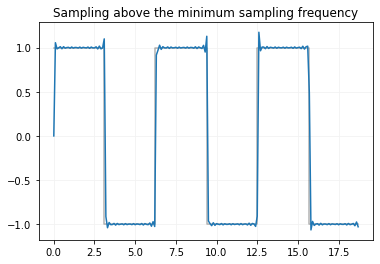

In [4]:
def fourier_series(k_total, t):
    sum = 0
    for k in range(1, k_total+1):
        sum = sum + (2/(k*np.pi))*(1-(-1)**k)*np.sin(k*t)
    return sum
        
t = []
x = []
fs  = []
for x1 in range(int(3*T/dt)):
    t.append(x1*dt)
    x.append(clock_signal(t[x1], A, T))
    fs.append(fourier_series(100, t[x1]))
    
plt.step(t, x, color='black', alpha=0.3)
plt.plot(t,  fs)

plt.grid(color='0.95')
plt.title('Sampling above the minimum sampling frequency')
plt.show()

## Frequency domain
A signal can be described in the time and the frequency domain. The signal is exactly the same! It is just another way to represent the signal. The frequency domain of a signal can be represented by a frequency spectrum. This spectrum shows how much each frequency is part of the signal.

<< What voorbeelden van spectrum >> 

## Fourier transform

We have discussed how strict period signals can be described by the fourier series. For non periodic continous time signals, we can also transform to its frequency domain. The fourier transform for continous signals (FTC) uses the comples number $e^{-jwt}$, which can be described as a real sine and cosine function.

$ e^{j\varphi} = Cos(\varphi) + jSin(\varphi) $

The folloing equation is used to transform a signal to its frequency domain (FTC)

FTC: $ X(\omega) = \int_{-\infty}^{\infty} x(t)e^{-j\omega{t}}dt $  |  $ x(t) \Longrightarrow X(\omega) $

From the frequency domain it is possible to transfer back to the time domain with the inverse Fourier transformation

IFTC: $ x(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} X(\omega)e^{j\omega{t}}dt $  |  $ X(\omega) \Longrightarrow x(t) $

## Spectrum is also complex!

<< Leg uit wat het imaginaire ding doen. >>

## Discrete Fourier transform

For the digital domain we can use the discrete Fourier transform

DFT: $ X(\omega) = \sum \limits_{n=-\infty}^{\infty} x[n] e^{-j\omega{n}} = \sum \limits_{n=0}^{N-1} x[n] e^{\frac{-j2\pi{k}n}{N}} $ |  $ x(n) \Longrightarrow X(\omega) $

IDFT: $ x[n] = \frac{1}{N} \sum \limits_{n=-\infty}^{\infty} X(\omega) e^{j\omega{n}} = \frac{1}{N} \sum \limits_{n=0}^{N-1} X(\omega) e^{\frac{j2\pi{k}n}{N}}$ |  $ X(\omega) \Longrightarrow x(n) $


## Fast Fourier Transform (FFT)

...

## Vragen

V. Bereken het frequency spectrum van ...

V. Implement the FFT algoritme zelf en bepaal het frequentie spectrum van een gegevens signaal

